In [1]:
!pip3 install pyserial
!pip3 install matplotlib


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [20]:
import serial
import matplotlib.pyplot as plt
import time
from datetime import datetime


# Create lists to store time and error values


# Track the start time


Kp: 2.0
Ki: 0.2
Kd: 0.2
Error: 500.0, Time: 0.00 seconds
Error: 507.0, Time: 32.37 seconds
Error: 504.0, Time: 32.51 seconds
Error: 507.0, Time: 32.56 seconds
Error: 510.0, Time: 32.63 seconds
Error: 511.0, Time: 65.93 seconds
Error: 513.0, Time: 66.08 seconds
Error: 513.0, Time: 66.15 seconds
Error: 513.0, Time: 66.22 seconds
Error: 502.0, Time: 99.35 seconds
Error: 497.0, Time: 99.52 seconds
Error: 488.0, Time: 99.60 seconds
Error: 479.0, Time: 99.66 seconds
Error: 474.0, Time: 132.67 seconds
Error: 463.0, Time: 132.73 seconds
Error: 453.0, Time: 132.75 seconds
Error: 443.0, Time: 132.77 seconds
Error: 395.0, Time: 166.20 seconds
Error: 386.0, Time: 166.35 seconds
Error: 376.0, Time: 166.42 seconds
Error: 366.0, Time: 166.49 seconds
Error: 354.0, Time: 199.71 seconds
Error: 331.0, Time: 200.52 seconds
Error: 320.0, Time: 201.26 seconds
Error: 306.0, Time: 202.02 seconds
Error: 237.0, Time: 233.09 seconds
Error: 228.0, Time: 233.15 seconds
Error: 215.0, Time: 233.19 seconds
Error: 204

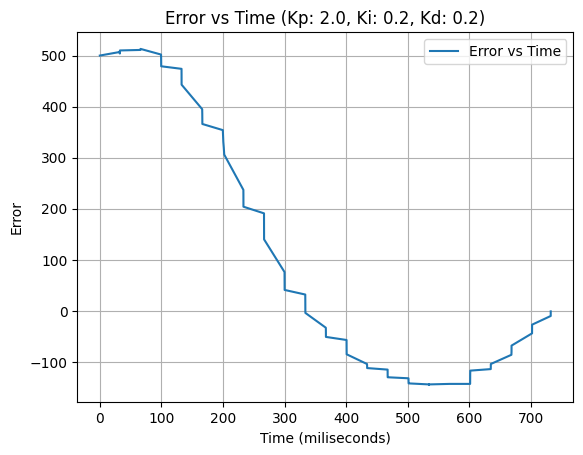

In [45]:
ser = serial.Serial('/dev/cu.usbserial-110', 9600)  # Adjust the port as needed

Kp = None
Ki = None
Kd = None
start_time = None
error_values = []
time_stamps = []

try:
    while True:
        # Read a line from the serial port
        line = ser.readline().decode('utf-8').strip()
        
        if line == "END":
            print("Received END, stopping...")
            break  # Stop reading when "END" is received
        
        if line:  # If the line is not empty
            try:
         # First three values are Kp, Ki, Kd
                if Kp is None:
                    Kp = float(line)
                    print(f"Kp: {Kp}")
                elif Ki is None:
                    Ki = float(line)
                    print(f"Ki: {Ki}")
                elif Kd is None:
                    Kd = float(line)
                    print(f"Kd: {Kd}")
                else:
                    # Parse the error value (assuming the line contains a numeric value)
                    error = float(line)
                    current_time = time.time() * 1000

                    if start_time is None:  # First value, set start time
                        start_time = current_time

                    # Calculate elapsed time
                    elapsed_time = current_time - start_time

                    # Store the error and time
                    error_values.append(error)
                    time_stamps.append(elapsed_time)

                    print(f"Error: {error}, Time: {elapsed_time:.2f} seconds")

            except ValueError:
                # Skip lines that don't contain valid numbers
                print(f"Non-numeric data received: {line}")

except KeyboardInterrupt:
    print("Serial reading interrupted.")

finally:
    # Close the serial port
    ser.close()

    # Plot error vs time
    if error_values and time_stamps:  # Check if we have any data to plot
        plt.figure()
        plt.plot(time_stamps, error_values, label="Error vs Time")
        plt.xlabel('Time (miliseconds)')
        plt.ylabel('Error')
        plt.title(f'Error vs Time (Kp: {Kp}, Ki: {Ki}, Kd: {Kd})')
        plt.legend()
        plt.grid(True)

        timestamp = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
        file_name = f'error_vs_time_{timestamp}.png'
        plt.savefig(file_name)

        plt.show()
    else:
        print("No data received.")

In [40]:
print(time_stamps)

[0.0, 0.0008029937744140625, 0.0009107589721679688, 0.0009632110595703125, 0.03354287147521973, 0.033663034439086914, 0.03371906280517578, 0.03377890586853027, 0.0668480396270752, 0.06698083877563477, 0.06705307960510254, 0.06716179847717285, 0.10052204132080078, 0.10069513320922852, 0.10093808174133301, 0.10105299949645996, 0.13386011123657227, 0.13396620750427246, 0.13400602340698242, 0.13404297828674316, 0.16745805740356445, 0.1675739288330078, 0.16762304306030273, 0.16767001152038574, 0.2009749412536621, 0.20114517211914062, 0.20123910903930664, 0.20133304595947266, 0.2342851161956787, 0.23476696014404297, 0.2348191738128662, 0.23486113548278809, 0.26766014099121094, 0.26770782470703125, 0.267733097076416, 0.2677581310272217, 0.3010890483856201, 0.30112791061401367, 0.30115604400634766, 0.30118298530578613, 0.33457303047180176, 0.3346118927001953, 0.3346419334411621, 0.3346719741821289, 0.3681919574737549, 0.36826300621032715, 0.36829495429992676, 0.3683278560638428, 0.368366956710

In [14]:
collected_data = []

def read_data(ser):
    output_file = 'arduino_output.txt'
    with open(output_file, 'w') as f:
        while True:
            # Read a line from the serial port
            line = ser.readline().decode('utf-8').strip()
            
            if line:  # If the line is not empty, write it to the file
                f.write(line + '\n')
                print(line)  # Optional: Print to console for debugging
                
            # Check for the specific line that indicates the end
            if " -> Shortest time: " in line:
                print("End of transmission detected.")
                break

    # Close the serial port
    ser.close()

    print(f"Output saved to {output_file}")

if __name__ == "__main__":
    ser = serial.Serial('/dev/cu.usbserial-110', 9600)  # Adjust the port as needed
    read_data(ser)

Kp: 1.00, Ki: 0.10, Kd: 0.10 -> Time: 455
Kp: 1.00, Ki: 0.10, Kd: 0.20 -> Time: 1470
Kp: 1.00, Ki: 0.10, Kd: 0.30 -> Time: 700
Kp: 1.00, Ki: 0.10, Kd: 0.40 -> Time: 3560
Kp: 1.00, Ki: 0.10, Kd: 0.50 -> Time: 6360


SerialException: read failed: [Errno 6] Device not configured